# Project 1
# Airbnb- An Exploratory Data Analysis (Canada Region)
# Project by Raj, Suhas, and Vijay

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import numpy as np
from api_keys import g_key
import gmaps
gmaps.configure(api_key=g_key)
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import linregress
import datetime
from datetime import datetime
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
canada_path = "Canada_listing.csv"
canada_file = pd.read_csv(canada_path,engine='python')
canada_file = canada_file.dropna(subset=["Price"])
canada_file.head()

ID    Host ID Host Name Host Since  Host Response Time  \
0  15451751   99117737       Jas   10/10/16                 NaN   
1  13344534    2466373   Jo (LJ)    25/5/12                 NaN   
2   3876126   18429450     Kevin    20/7/14      within an hour   
3  14717064   90483081      Yvan    17/8/16  within a few hours   
4  16273259  106428340     Shima    6/12/16  a few days or more   

   Host Listings Count Neighbourhood Cleansed       City State Country  ...  \
0                  1.0               Fairview  Vancouver    BC  Canada  ...   
1                  1.0               Downtown  Vancouver    BC  Canada  ...   
2                  5.0               Downtown  Vancouver    BC  Canada  ...   
3                  3.0               Downtown  Vancouver    BC  Canada  ...   
4                  1.0               Downtown  Vancouver    BC  Canada  ...   

                                           Amenities  Price Cleaning Fee  \
0  Internet,Wireless Internet,Kitchen,Elevator in...   60.0         10.0   
1  Wireless Internet,Pool,Kitchen,Doorman,Gym,Ele...  139.0         75.0   
2  TV,Cable TV,Internet,Wireless Internet,Air con...  300.0        120.0   
3  Wireless Internet,Air conditioning,Kitchen,Gym...  121.0          NaN   
4  TV,Wireless Internet,Pool,Kitchen,Free parking...  101.0         60.0   

  Calendar last Scraped  Number of Reviews  Last Review  Review Scores Rating  \
0                7/4/17                  0          NaN                   NaN   
1                7/4/17                  0          NaN                   NaN   
2                7/4/17                179      28/3/17                  96.0   
3                7/4/17                 10     26/11/16                  90.0   
4                7/4/17                  2       3/1/17                 100.0   

   Cancellation Policy                    Geolocation  \
0             moderate  49.2638521478, -123.135635265   
1             flexible  49.2771525101, -123.123770123   
2               strict  49.2801055699, -123.119478686   
3             flexible  49.2798248131, -123.124031428   
4             flexible  49.2729954654, -123.127823389   

                                            Features  
0             Host Has Profile Pic,Is Location Exact  
1  Host Has Profile Pic,Host Identity Verified,Is...  
2             Host Has Profile Pic,Is Location Exact  
3             Host Has Profile Pic,Is Location Exact  
4  Host Has Profile Pic,Host Identity Verified,Is...  

[5 rows x 28 columns]

# Cleaning State column data based on lat/lon

In [3]:
canada_file["State"].unique()

array(['BC', 'British Columbia', 'QC', 'QuŽbec', 'Quebec', 'ON',
       'Ontario', '1', '____', 'Qc', 'Canada', 'B.c.', 'Bc',
       'QuŽbec City', 'Montreal', 'QuÌ©bec', nan, 'On', 'bc',
       'British columbia', 'Ottawa', 'Ont', 'Quebec H3G 1V3 Canada',
       'B.C.'], dtype=object)

In [4]:
canada_file["State"].replace(["British Columbia","B.c.","B.C."],"BC",inplace=True)
canada_file["State"].replace(["Bc","bc","British columbia",],"BC",inplace=True)
canada_file["State"].replace(["QuŽbec","Quebec","Qc","QuŽbec City","QuÌ©bec","Quebec H3G 1V3 Canada"],"QC",inplace=True)
canada_file["State"].replace(["1","On","Ottawa","Ont","Ontario"],"ON",inplace=True)
canada_file["State"].replace(['Canada', 'Montreal'],"QC",inplace=True)


In [5]:
canada_file.loc[(canada_file['Neighbourhood Cleansed']=="Newtonbrook West") & 
                          (canada_file['Neighbourhood Cleansed']=="L'Amoreaux") & 
                          (canada_file['Neighbourhood Cleansed']=="Willowdale East") & 
                (canada_file['State']=="____") , ['State']] ="ON"
canada_file["State"].replace(['____'],"QC",inplace=True)
canada_file.loc[(canada_file['Neighbourhood Cleansed']=="South Parkdale") , ['State']] = "ON"
canada_file['State'].fillna('QC' , inplace=True)

In [6]:
canada_file = canada_file.loc[canada_file['Price']>=0]

canada_file["State"].unique()

array(['BC', 'QC', 'ON'], dtype=object)

In [7]:
canada_file.count()

ID                        30692
Host ID                   30692
Host Name                 30685
Host Since                30685
Host Response Time        23214
Host Listings Count       30685
Neighbourhood Cleansed    30692
City                      30690
State                     30692
Country                   30692
Latitude                  30692
Longitude                 30692
Property Type             30691
Room Type                 30692
Accommodates              30692
Bathrooms                 30574
Bedrooms                  30671
Beds                      30635
Amenities                 30331
Price                     30692
Cleaning Fee              19753
Calendar last Scraped     30692
Number of Reviews         30692
Last Review               22861
Review Scores Rating      22487
Cancellation Policy       30692
Geolocation               30692
Features                  30680
dtype: int64

# Mapping all Airbnb Locations in Canada from Dataset (Zoom in for each city)

In [8]:
fig = go.Figure(data=go.Scattergeo(
        lon = canada_file['Longitude'],
        lat = canada_file['Latitude'],
        text = canada_file['State'],
        mode = 'markers',
        marker_color = 'red',
        ))

fig.update_layout(
        title = 'Provinces with Airbnb in Canada<br>(Hover for province name)',
        geo_scope='north america',
    )
fig.show()

Overview of Data:

After inception in 2008, Airbnb has grown exponentially around Globe and Canada. It's impact on the Housing marekts, hotel prices, tourism is huge.

Airbnb's success is not dependent on Tourists but also on Business Travelleres; seeking short term rentals.

Analysig a sample of 30K+ properties across Canada.

Based on the sample; Concentration of Airbnbs are around named and famous cities. Probably becasue, ease of transportation, number of things to do, among other reasons.
Prices range from few dollars to $1000; these are subjective to minimun number nights to stay, location, type of dwelling, etc.

Prices are higher around city central/downtown compared to other parts. This includes reasons like transportation, areas of interest which are nearby, Business travellers prefer to stay in city than remote areas, etc.

Overall average price per night is around CAD 110. But it varies based on locations and housing and rentals rules and regulations, among few other factors.

# Statistical calculations on cleaned Dataset.

In [9]:
#canada_file.count()
canada_file = canada_file.loc[(canada_file["State"]=="ON") | (canada_file["State"]=="BC") |
                        (canada_file["State"]=="QC"),:]
canada_file.head()

ID    Host ID Host Name Host Since  Host Response Time  \
0  15451751   99117737       Jas   10/10/16                 NaN   
1  13344534    2466373   Jo (LJ)    25/5/12                 NaN   
2   3876126   18429450     Kevin    20/7/14      within an hour   
3  14717064   90483081      Yvan    17/8/16  within a few hours   
4  16273259  106428340     Shima    6/12/16  a few days or more   

   Host Listings Count Neighbourhood Cleansed       City State Country  ...  \
0                  1.0               Fairview  Vancouver    BC  Canada  ...   
1                  1.0               Downtown  Vancouver    BC  Canada  ...   
2                  5.0               Downtown  Vancouver    BC  Canada  ...   
3                  3.0               Downtown  Vancouver    BC  Canada  ...   
4                  1.0               Downtown  Vancouver    BC  Canada  ...   

                                           Amenities  Price Cleaning Fee  \
0  Internet,Wireless Internet,Kitchen,Elevator in...   60.0         10.0   
1  Wireless Internet,Pool,Kitchen,Doorman,Gym,Ele...  139.0         75.0   
2  TV,Cable TV,Internet,Wireless Internet,Air con...  300.0        120.0   
3  Wireless Internet,Air conditioning,Kitchen,Gym...  121.0          NaN   
4  TV,Wireless Internet,Pool,Kitchen,Free parking...  101.0         60.0   

  Calendar last Scraped  Number of Reviews  Last Review  Review Scores Rating  \
0                7/4/17                  0          NaN                   NaN   
1                7/4/17                  0          NaN                   NaN   
2                7/4/17                179      28/3/17                  96.0   
3                7/4/17                 10     26/11/16                  90.0   
4                7/4/17                  2       3/1/17                 100.0   

   Cancellation Policy                    Geolocation  \
0             moderate  49.2638521478, -123.135635265   
1             flexible  49.2771525101, -123.123770123   
2               strict  49.2801055699, -123.119478686   
3             flexible  49.2798248131, -123.124031428   
4             flexible  49.2729954654, -123.127823389   

                                            Features  
0             Host Has Profile Pic,Is Location Exact  
1  Host Has Profile Pic,Host Identity Verified,Is...  
2             Host Has Profile Pic,Is Location Exact  
3             Host Has Profile Pic,Is Location Exact  
4  Host Has Profile Pic,Host Identity Verified,Is...  

[5 rows x 28 columns]

In [10]:
Total_listings = canada_file['ID'].count()
Avg_price = round(canada_file['Price'].mean(),2)
Avg_reviews = round(canada_file['Number of Reviews'].mean(),2)
Avg_ratings = round(canada_file["Review Scores Rating"].mean(),2)
Avg_hosts = round(canada_file["Host Listings Count"].mean(),2)
Canada_summary = pd.DataFrame({"Total listings":[Total_listings],"Average Price ($)":[Avg_price],
                              "Average number of reviews":[Avg_reviews],"Average Rating Score":[Avg_ratings],
                              "Average listings per host":[Avg_hosts]})
Canada_summary

Total listings  Average Price ($)  Average number of reviews  \
0           30692             107.01                      14.32   

   Average Rating Score  Average listings per host  
0                 93.45                        3.7

Observation:

If a property gets reviwed 14 times, have a rating score of 93 and prices under CAD 107; can be considered a good option to rent an Airbnb.

The average listing per host is above 3; which tells us that people are investing in short-term rentals like Airbnb more than conventional long term rental units. Drawback of this is that it can skew the data when it comes to constructing more homes especially in needy times and inflate the housing prices exponentially.

# Statistical summary based on Room Type.

In [11]:
canada_roomtype = round(canada_file.groupby(["Room Type"])["Price"].mean(),2)
canada_roomtype = '$'+canada_roomtype.astype(str)
canada_roomtype_listings = round(canada_file.groupby(["Room Type"])["ID"].count(),2)
canada_roomtype_reviews = round(canada_file.groupby(["Room Type"])["Number of Reviews"].mean(),2)
canada_roomtype_ratings = round(canada_file.groupby(["Room Type"])["Review Scores Rating"].mean(),2)
canada_roomtype_host = round(canada_file.groupby(["Room Type"])["Host Listings Count"].mean(),2)
canda_roomtype_percent = round((canada_roomtype_listings/Total_listings)*100,2)
canda_roomtype_percent = canda_roomtype_percent.astype(str) +'%'
canada_roomtype_summary = pd.DataFrame({"Number of Listings":canada_roomtype_listings,"Percentage of listing":canda_roomtype_percent,
                                        "Average Price":canada_roomtype,
                                       "Avg number of reviews":canada_roomtype_reviews,"Avg of Rating score":canada_roomtype_ratings,
                                       "Avg listings per host":canada_roomtype_host})
canada_roomtype_summary

Number of Listings Percentage of listing Average Price  \
Room Type                                                                 
Entire home/apt               18957                61.77%       $136.38   
Private room                  11096                36.15%         $59.6   
Shared room                     639                 2.08%        $59.17   

                 Avg number of reviews  Avg of Rating score  \
Room Type                                                     
Entire home/apt                  16.29                93.77   
Private room                     11.32                92.83   
Shared room                       8.16                92.64   

                 Avg listings per host  
Room Type                               
Entire home/apt                   4.14  
Private room                      3.01  
Shared room                       2.67

Observations:
    
    Majority of the listings are Entire Homes or Apartments, indicated by 62% of the total listings.
    The cost for renting an entire home or apartmetn is more than double the price when compared to renting a private room.
    The price difference between renting a private room or shared room is negligible.

# Statistical Summary based on Provinces.

In [12]:
canada_states_price = round(canada_file.groupby(["State"])["Price"].mean(),2)
canada_states_price = '$'+ canada_states_price.astype(str)
canada_states_reviews = round(canada_file.groupby(["State"])["Number of Reviews"].mean(),2)
canada_states_ratings = round(canada_file.groupby(["State"])["Review Scores Rating"].mean(),2)
canada_states_count = canada_file.groupby(["State"])["ID"].count()
canada_states_host = round(canada_file.groupby(["State"])["Host Listings Count"].mean(),2)
canada_states_summary = pd.DataFrame({"Number of Listings":canada_states_count,"Average Price":canada_states_price,
                                      "Average number of Reviews":canada_states_reviews,"Average of Ratings":canada_states_ratings,
                                      "Avg listing per host":canada_states_host,})
canada_states_summary['Percentage of Listings'] = round((canada_states_summary['Number of Listings']
                                                          /Total_listings)*100,2).astype(str) +'%'

canada_states_summary.reset_index()
canada_states_summary

Number of Listings Average Price  Average number of Reviews  \
State                                                                
BC                   5525       $130.02                      18.70   
ON                  12659       $118.51                      16.05   
QC                  12508         $85.2                      10.64   

       Average of Ratings  Avg listing per host Percentage of Listings  
State                                                                   
BC                   94.2                  2.62                  18.0%  
ON                   94.0                  3.98                 41.25%  
QC                   92.4                  3.90                 40.75%

Observation:
    
More than 80% of listings are in Eastern part of Canada than the rest.

With around 70% less price compared to British Columbia and Ontario; Quebec has cheapest rents.

BC prices are higher than other 2 states. Reason:

    1. Property rates in British Columbia's are much higher than Ontario and Quebec
    2. Number of listings are way lower than other 2 provinces. This is becasue on April 2018, a number Airbnb dwellings
    made illegal by its Mayor.
    
Based on earlier observation; Toronto, Ontario is likely to have more options based on price, availability and relaibility.

We have taken # of reviews as proxy to demand of Airbnb, becasue that data was not available. The demand of of properties in BC are higher than other 2 states.

# Statistical summary and Visualization of State wise Room type Data for Canada.

In [13]:
canada_room_price = round(canada_file.groupby(["State","Room Type"])["Price"].mean(),2)
canada_room_price = '$' + canada_room_price.astype(str)
canada_room_count = canada_file.groupby(["State","Room Type"])["ID"].count()
canada_room_reviews = round(canada_file.groupby(["State","Room Type"])["Number of Reviews"].mean(),2)
canada_room_ratings = round(canada_file.groupby(["State","Room Type"])["Review Scores Rating"].mean(),2)
canada_room_host = round(canada_file.groupby(["State","Room Type"])["Host Listings Count"].mean(),2)
canada_room_summary = pd.DataFrame({"Number of Listings":canada_room_count,"Average Price":canada_room_price,
                                   "Number of Reviews":canada_room_reviews,"Average of Rating Score":canada_room_ratings,
                                   "Average listings per Host":canada_room_host})
canada_room_summary

Number of Listings Average Price  Number of Reviews  \
State Room Type                                                              
BC    Entire home/apt                3687       $158.79              20.08   
      Private room                   1688        $71.04              16.62   
      Shared room                     150        $86.87               8.22   
ON    Entire home/apt                7839       $150.77              18.13   
      Private room                   4515         $66.9              12.91   
      Shared room                     305        $53.48               9.10   
QC    Entire home/apt                7431       $110.07              12.46   
      Private room                   4893        $48.91               8.03   
      Shared room                     184        $46.03               6.55   

                       Average of Rating Score  Average listings per Host  
State Room Type                                                            
BC    Entire home/apt                    94.61                       2.29  
      Private room                       93.22                       3.32  
      Shared room                        94.00                       2.69  
ON    Entire home/apt                    94.46                       4.00  
      Private room                       93.15                       4.02  
      Shared room                        93.54                       2.68  
QC    Entire home/apt                    92.52                       5.20  
      Private room                       92.27                       1.97  
      Shared room                        89.62                       2.62

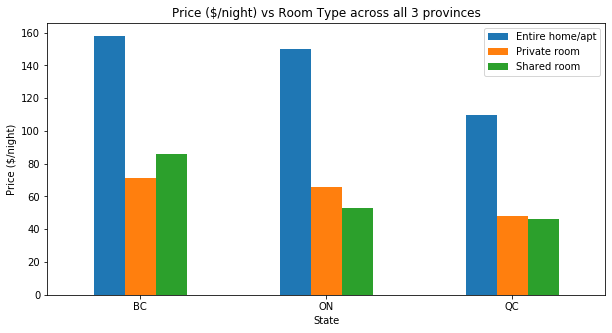

In [14]:
price_overview = canada_file.groupby(["State","Room Type"])['Price'].mean().to_frame().astype(int)

price_overview.unstack().plot(kind='bar', rot = 0 , figsize=(10,5))
plt.legend(price_overview.index.get_level_values('Room Type'))
plt.ylabel('Price ($/night)')
plt.title("Price ($/night) vs Room Type across all 3 provinces")
plt.savefig("Images/Price_roomtype_canada.png")

Observation:
    

Entire apartments are priced higher than other 2 categories, as expected. But, it is intresting to note that entire apartments are generally rented by families, so probably effective cost per person could be less/comparable than others.

While price of Private and shared rooms are comparable, number of units available for Private rooms are way high. It can be concluded that, people like to have their private space when it comes to sharing and budget options. Another assumption could be, people who travel alone and for business like to have thier private space but still want to choose a budgted option.

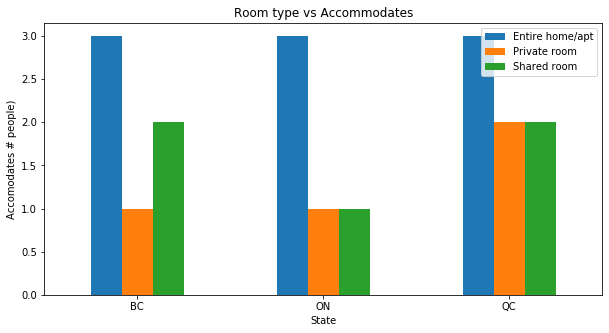

In [15]:
accomodation_overview = canada_file.groupby(["State","Room Type"])['Accommodates'].mean().to_frame().astype(int)

accomodation_overview.unstack().plot(kind='bar', rot = 0 , figsize=(10,5))
plt.legend(accomodation_overview.index.get_level_values('Room Type') , loc='best')
plt.ylabel('Accomodates # people)')
plt.title("Room type vs Accommodates")
plt.savefig("Images/accommodate_roomtype_canada.png")

Observation:
    
As expected, Entire Aprtments have more capacity than other 2 types. It is intresting to note that average capacity of Entire Apartment is 3 across states.

From earlier analysis we know that average price for renting an Entire apartment is $136. So, if you're a party of 3+ people; renting an Entire aprtment makes more sense than other 2 types.

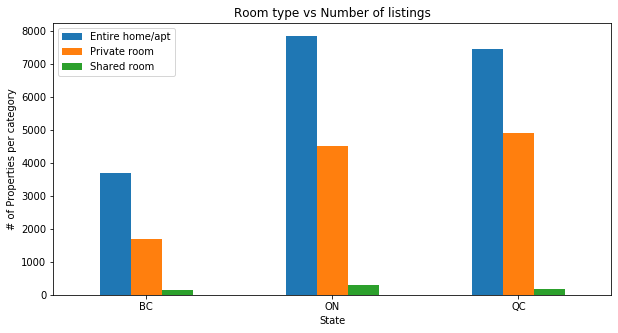

In [16]:
accomodation_overview = canada_file.groupby(["State","Room Type"])['ID'].count().to_frame().astype(int)

accomodation_overview.unstack().plot(kind='bar', rot = 0 , figsize=(10,5))
plt.legend(accomodation_overview.index.get_level_values('Room Type') , loc='best')
plt.ylabel('# of Properties per category')
plt.title("Room type vs Number of listings")
plt.savefig("Images/listings_roomtype_canada.png")

Observations:
    
Entire apartments are numbered highest among 3 catgories. Which tells us:

People are more comfortable in renting the entire property.
Since they are priced at higher fare; hosts are likely to make more money from rents than other 2 categories.
It may also be hypothesised that people who travel alone, may prefer to rent a hotel than AirBNBs.


# Animated Bar chart to show increase in number of listings over the years.

In [17]:
canada_file['Host Year'] = pd.to_datetime(canada_file['Host Since'], format='%d/%m/%y')
canada_file['year'] = pd.DatetimeIndex(canada_file['Host Year']).year
canada_file.dtypes

ID                                 int64
Host ID                            int64
Host Name                         object
Host Since                        object
Host Response Time                object
Host Listings Count              float64
Neighbourhood Cleansed            object
City                              object
State                             object
Country                           object
Latitude                         float64
Longitude                        float64
Property Type                     object
Room Type                         object
Accommodates                       int64
Bathrooms                        float64
Bedrooms                         float64
Beds                             float64
Amenities                         object
Price                            float64
Cleaning Fee                     float64
Calendar last Scraped             object
Number of Reviews                  int64
Last Review                       object
Review Scores Ra

In [18]:
canada_year = canada_file.groupby(["year"])["ID"].count()
canada_file['month'] = pd.DatetimeIndex(canada_file['Host Year']).month
canada_year = canada_file.groupby(["year"])["ID"].count()
canada_year

year
2008.0      14
2009.0     134
2010.0     455
2011.0    1639
2012.0    3194
2013.0    4332
2014.0    6334
2015.0    8278
2016.0    5237
2017.0    1068
Name: ID, dtype: int64

In [19]:
canada_year_state = canada_file.groupby(["year","State"])["ID"].count()
canada_year_state = pd.DataFrame({"List":canada_year_state})
df = canada_year_state.reset_index()
df_new = df.groupby("State")["List"].cumsum()
df["Listings"] = df_new
df

year State  List  Listings
0   2008.0    ON     5         5
1   2008.0    QC     9         9
2   2009.0    BC    55        55
3   2009.0    ON    29        34
4   2009.0    QC    50        59
5   2010.0    BC   112       167
6   2010.0    ON   146       180
7   2010.0    QC   197       256
8   2011.0    BC   287       454
9   2011.0    ON   636       816
10  2011.0    QC   716       972
11  2012.0    BC   547      1001
12  2012.0    ON  1216      2032
13  2012.0    QC  1431      2403
14  2013.0    BC   835      1836
15  2013.0    ON  1551      3583
16  2013.0    QC  1946      4349
17  2014.0    BC  1098      2934
18  2014.0    ON  2320      5903
19  2014.0    QC  2916      7265
20  2015.0    BC  1199      4133
21  2015.0    ON  3204      9107
22  2015.0    QC  3875     11140
23  2016.0    BC  1219      5352
24  2016.0    ON  2762     11869
25  2016.0    QC  1256     12396
26  2017.0    BC   172      5524
27  2017.0    ON   789     12658
28  2017.0    QC   107     12503

In [20]:
current_year = 2017
dff = df[df['year'].eq(current_year)].sort_values(by='Listings', ascending=True).head(10)
dff

year State  List  Listings
26  2017.0    BC   172      5524
28  2017.0    QC   107     12503
27  2017.0    ON   789     12658

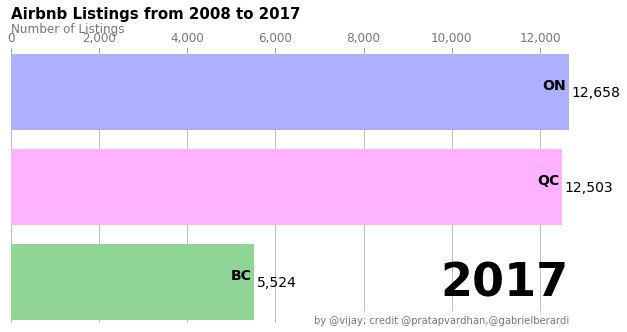

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))

def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='Listings', ascending=True).tail(10)
    ax.clear()
    colors = dict(zip(
    ['ON','QC','BC'],
    ['#adb0ff', '#ffb3ff', '#90d595']
))
    dx = dff['Listings'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Listings'], dff['State'])):
        ax.barh(dff['State'], dff['Listings'],color=[colors[x] for x in dff['State']])
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.1, year, transform=ax.transAxes, color='black', size=46, ha='right', weight=800)
    ax.text(0, 1.07, 'Number of Listings', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Airbnb Listings from 2008 to 2017',
            transform=ax.transAxes, size=15, weight=600, ha='left')
    ax.text(1, 0, 'by @vijay; credit @pratapvardhan,@gabrielberardi', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2017)

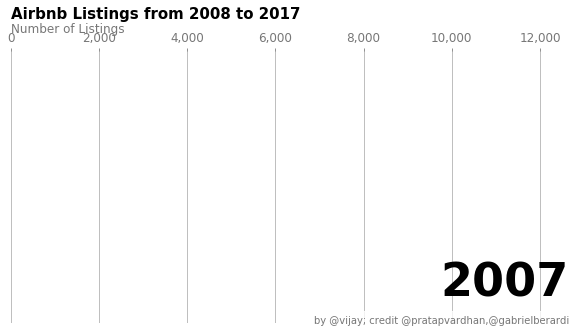

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2007, 2018))
animator.save("Canada Listing Race Chart.mp4",fps = .75, bitrate = 1800)
HTML(animator.to_jshtml())

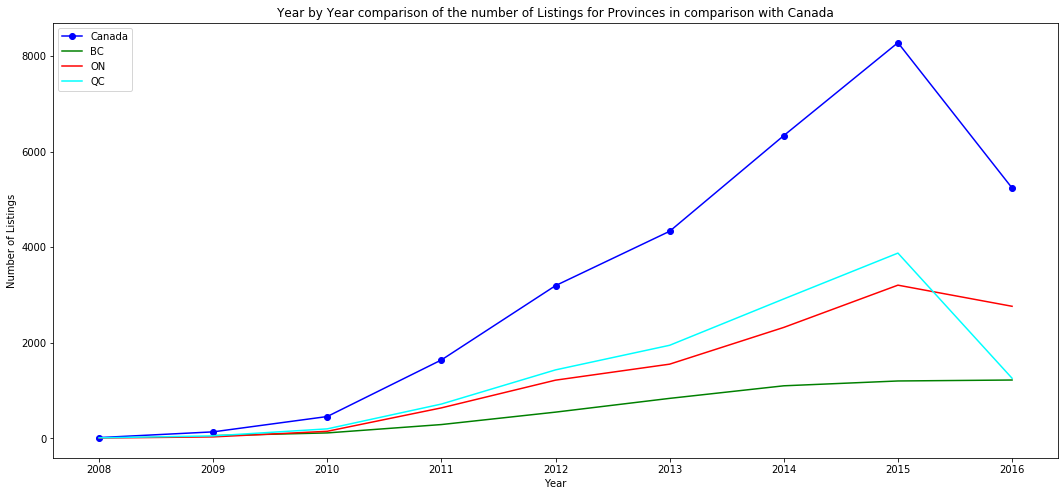

In [23]:
canada_year_state = canada_file.groupby(["year","State"])["ID"].count()
canada_year_review_state = canada_file.groupby(["year","State"])["Review Scores Rating"].mean()
canada_review_state = pd.DataFrame({"List":canada_year_state,"Rating":canada_year_review_state})
df_state = canada_review_state.reset_index()
df_state = df_state[:-3]

canada_year = canada_file.groupby(["year"])["ID"].count()
canada_year_review = canada_file.groupby(["year"])["Review Scores Rating"].mean()
canada_year_review = pd.DataFrame({"List":canada_year,"Rating":canada_year_review})
df_review = canada_year_review.reset_index()
df_review = df_review[:-1]

df_state_BC = df_state.loc[df_state["State"]=="BC"]
df_state_ON = df_state.loc[df_state["State"]=="ON"]
df_state_QC = df_state.loc[df_state["State"]=="QC"]
plt.figure(figsize=(18,8))
plt.plot(df_review["year"],df_review["List"],'-o', color='blue', label="Canada")
plt.plot(df_state_BC["year"],df_state_BC["List"], color='green', label="BC")
plt.plot(df_state_ON["year"],df_state_ON["List"], color='red', label="ON")
plt.plot(df_state_QC["year"],df_state_QC["List"], color='aqua', label="QC")
plt.legend(loc="upper left")
plt.xlabel("Year")
plt.ylabel("Number of Listings")
plt.title("Year by Year comparison of the number of Listings for Provinces in comparison with Canada")
plt.savefig("Images/listings_line_Canada.png")

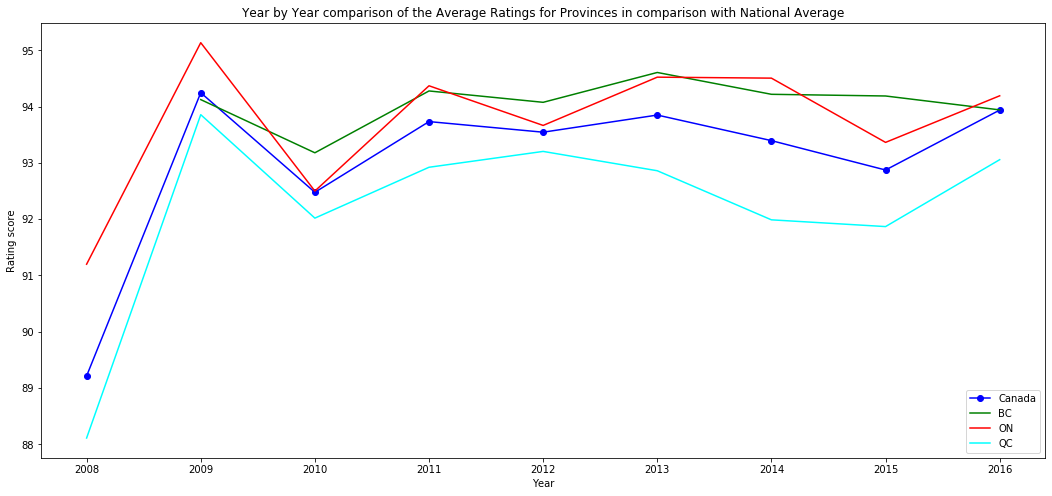

In [24]:
plt.figure(figsize=(18,8))
plt.plot(df_review["year"],df_review["Rating"],'-o', color='blue', label="Canada")
plt.plot(df_state_BC["year"],df_state_BC["Rating"], color='green', label="BC")
plt.plot(df_state_ON["year"],df_state_ON["Rating"], color='red', label="ON")
plt.plot(df_state_QC["year"],df_state_QC["Rating"], color='aqua', label="QC")
plt.legend(loc="lower right")
plt.xlabel("Year")
plt.ylabel("Rating score")
plt.title("Year by Year comparison of the Average Ratings for Provinces in comparison with National Average")
plt.savefig("Images/Ratings_line_Canada.png")


In [25]:
canada_response = canada_file.groupby(["Host Response Time"])["ID"].count()
canada_response_rating = canada_file.groupby(["Host Response Time"])["Review Scores Rating"].mean()
canada_response_summary = pd.DataFrame({"Response count":canada_response,"Avg Rating score":canada_response_rating})
canada_response_summary

Response count  Avg Rating score
Host Response Time                                  
a few days or more             679         89.867830
within a day                  4391         93.405405
within a few hours            6231         93.527251
within an hour               11913         93.851257

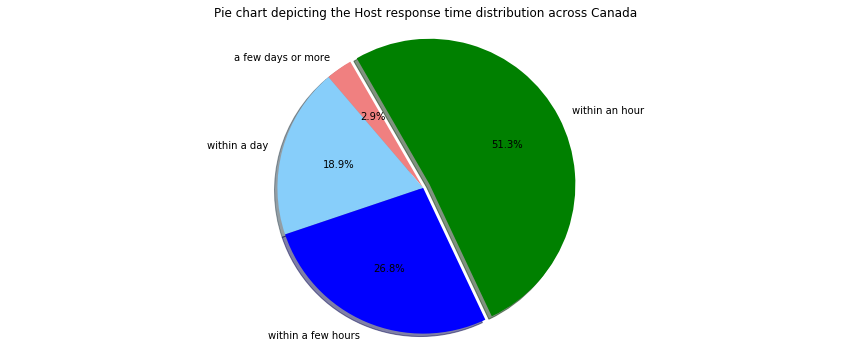

In [26]:
canada_response_time = canada_response_summary["Response count"]

labels = ["a few days or more", "within a day", "within a few hours", "within an hour"]

# The values of each section of the pie chart
sizes = canada_response_summary["Response count"]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue","blue","green"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0, 0.05)
plt.figure(figsize=(15,6))
plt.title("Pie chart depicting the Host response time distribution across Canada")
plt.pie(sizes,explode = explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.savefig("Images/Response_pie_Canada.png")

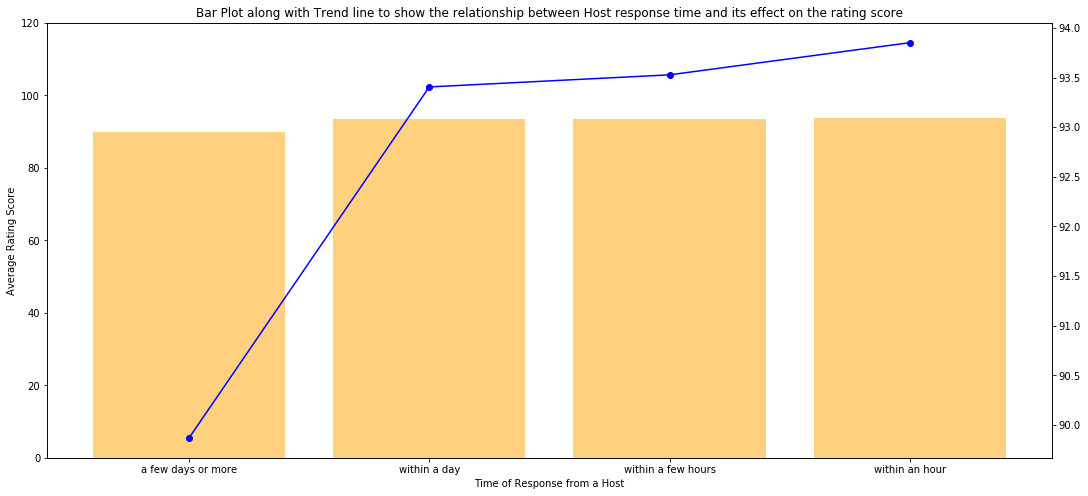

In [27]:
canada_r_summary = canada_response_summary.reset_index()
x_axis = canada_r_summary["Host Response Time"]
y_axis = canada_r_summary["Avg Rating score"]
plt.figure(figsize=(18,8))
plt.ylim(0,120)
plt.bar(x_axis, y_axis, color='orange', alpha=0.5, align="center")
plt.xlabel("Time of Response from a Host")
plt.ylabel("Average Rating Score")
plt.title("Bar Plot along with Trend line to show the relationship between Host response time and its effect on the rating score")
axes2 = plt.twinx()
axes2.plot(x_axis, y_axis,'-o', color='b')
plt.savefig("Images/Response_bar_Canada.png")

# Analysis of Data for each of the 3 provinces and find the Top 3 Neighbourhoods in that Province.

# 1. British Columbia (BC)

In [28]:
canada_bc = canada_file.loc[canada_file["State"]=="BC",:]
canada_bc.head()

ID    Host ID Host Name Host Since  Host Response Time  \
0  15451751   99117737       Jas   10/10/16                 NaN   
1  13344534    2466373   Jo (LJ)    25/5/12                 NaN   
2   3876126   18429450     Kevin    20/7/14      within an hour   
3  14717064   90483081      Yvan    17/8/16  within a few hours   
4  16273259  106428340     Shima    6/12/16  a few days or more   

   Host Listings Count Neighbourhood Cleansed       City State Country  ...  \
0                  1.0               Fairview  Vancouver    BC  Canada  ...   
1                  1.0               Downtown  Vancouver    BC  Canada  ...   
2                  5.0               Downtown  Vancouver    BC  Canada  ...   
3                  3.0               Downtown  Vancouver    BC  Canada  ...   
4                  1.0               Downtown  Vancouver    BC  Canada  ...   

   Calendar last Scraped  Number of Reviews Last Review Review Scores Rating  \
0                 7/4/17                  0         NaN                  NaN   
1                 7/4/17                  0         NaN                  NaN   
2                 7/4/17                179     28/3/17                 96.0   
3                 7/4/17                 10    26/11/16                 90.0   
4                 7/4/17                  2      3/1/17                100.0   

   Cancellation Policy                    Geolocation  \
0             moderate  49.2638521478, -123.135635265   
1             flexible  49.2771525101, -123.123770123   
2               strict  49.2801055699, -123.119478686   
3             flexible  49.2798248131, -123.124031428   
4             flexible  49.2729954654, -123.127823389   

                                            Features  Host Year    year  month  
0             Host Has Profile Pic,Is Location Exact 2016-10-10  2016.0   10.0  
1  Host Has Profile Pic,Host Identity Verified,Is... 2012-05-25  2012.0    5.0  
2             Host Has Profile Pic,Is Location Exact 2014-07-20  2014.0    7.0  
3             Host Has Profile Pic,Is Location Exact 2016-08-17  2016.0    8.0  
4  Host Has Profile Pic,Host Identity Verified,Is... 2016-12-06  2016.0   12.0  

[5 rows x 31 columns]

In [29]:
# AirBnB Price Range density in BC
locations = canada_bc[["Latitude","Longitude"]]
density = canada_bc["ID"]
fig = gmaps.figure()
fig

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=density, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=0.001)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [30]:
# AirBnB Price Range density in QC
locations = canada_bc[["Latitude","Longitude"]]
density = canada_bc["Price"]
fig = gmaps.figure()
fig

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=density, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=0.001)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

# Establish if any relationship between Price and Number of people a listing can Accommodate.

The r-squared is: 0.5899224555368028
The p value is: 0.0


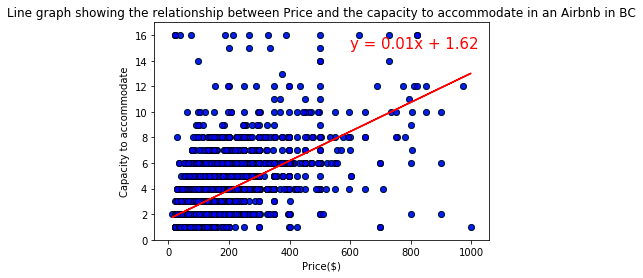

In [31]:
plt.scatter(canada_bc["Price"],canada_bc["Accommodates"])
x_values = canada_bc["Price"]
y_values = canada_bc["Accommodates"]
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f"The r-squared is: {rvalue}")
print(f"The p value is: {pvalue}")
regress_value = x_values*slope + intercept
plt.scatter(x_values,y_values, marker="o", facecolors='blue', edgecolors="black",alpha=0.75)
plt.plot(x_values,regress_value,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Line graph showing the relationship between Price and the capacity to accommodate in an Airbnb in BC")
plt.xlabel("Price($)")
plt.ylabel("Capacity to accommodate")
plt.annotate(line_eq,(600,15),fontsize=15,color='red')
plt.savefig("Images/BC/scatter_BC.png")

Observation:

With increase in space, price also increases. There is a moderate relationship between 2 variables, which is evident from r squared value. But, We still need to input more factors to find the infuence of hike in price across dwellings as we can see there are several residual values.

# Cancellation Policy For BC

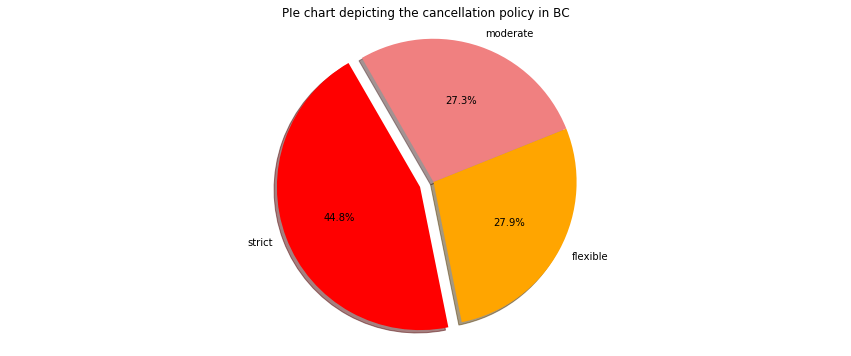

In [32]:
bc_cancel = canada_bc["Cancellation Policy"].value_counts()
bc_policy = pd.DataFrame({"Count":bc_cancel})

labels = ["strict", "flexible", "moderate"]

# The values of each section of the pie chart
sizes = bc_policy["Count"]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0, 0)
plt.figure(figsize=(15,6))
plt.title("PIe chart depicting the cancellation policy in BC")
plt.pie(sizes,explode = explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.savefig("Images/BC/cancellation_policy_BC.png")

# Pie Chart for BC based on Host response time

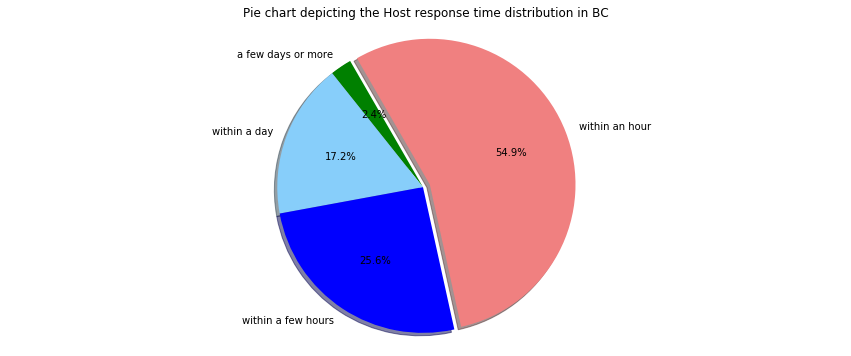

In [33]:
canada_bc_response = canada_bc.groupby(["Host Response Time"])["ID"].count()
canada_bc_rating = canada_bc.groupby(["Host Response Time"])["Review Scores Rating"].mean()
canada_bc_summary1 = pd.DataFrame({"Response count":canada_bc_response,"Avg Rating score":canada_bc_rating})
canada_bc_summary1

canada_response_bc = canada_bc_summary1["Response count"]

labels = ["a few days or more", "within a day", "within a few hours", "within an hour"]

# The values of each section of the pie chart
sizes = canada_bc_summary1["Response count"]

# The colors of each section of the pie chart
colors = ["green", "lightskyblue","blue","lightcoral"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0, 0.05)
plt.figure(figsize=(15,6))
plt.title("Pie chart depicting the Host response time distribution in BC")
plt.pie(sizes,explode = explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.savefig("Images/BC/Response_pie_BC.png")

# Statistical Summary for all the Neighbourhoods.

In [34]:
canada_bc["Neighbourhood Cleansed"].unique()

array(['Fairview', 'Downtown', 'Strathcona', 'Mount Pleasant',
       'Grandview-Woodland', 'Arbutus Ridge', 'Kensington-Cedar Cottage',
       'Killarney', 'Kerrisdale', 'Sunset', 'Kitsilano',
       'Victoria-Fraserview', 'South Cambie', 'West End', 'Riley Park',
       'West Point Grey', 'Oakridge', 'Downtown Eastside',
       'Dunbar Southlands', 'Renfrew-Collingwood', 'Hastings-Sunrise',
       'Marpole', 'Shaughnessy'], dtype=object)

In [35]:
bc_listings = canada_bc.groupby(["Neighbourhood Cleansed"])["ID"].count()
bc_price = round(canada_bc.groupby(["Neighbourhood Cleansed"])["Price"].mean(),2)
#bc_price = '$' + bc_price.astype(str)
bc_reviews = round(canada_bc.groupby(["Neighbourhood Cleansed"])["Number of Reviews"].mean(),2)
bc_ratings = round(canada_bc.groupby(["Neighbourhood Cleansed"])["Review Scores Rating"].mean(),2)

bc_summary = pd.DataFrame({"Number of listings":bc_listings,"Average Price ($)":bc_price,
                          "Avg Number of reviews":bc_reviews,"Avg of Ratings":bc_ratings})
bc_summary

Number of listings  Average Price ($)  \
Neighbourhood Cleansed                                            
Arbutus Ridge                             66             194.05   
Downtown                                 990             155.54   
Downtown Eastside                        288             136.11   
Dunbar Southlands                        133             168.40   
Fairview                                 280             129.09   
Grandview-Woodland                       372             110.09   
Hastings-Sunrise                         186              97.10   
Kensington-Cedar Cottage                 342             106.18   
Kerrisdale                                61             129.49   
Killarney                                 51              69.90   
Kitsilano                                688             147.09   
Marpole                                  111              87.05   
Mount Pleasant                           492             126.66   
Oakridge                                  61             132.69   
Renfrew-Collingwood                      204              79.68   
Riley Park                               259             127.54   
Shaughnessy                               45             118.53   
South Cambie                              77             117.13   
Strathcona                                26             129.62   
Sunset                                    97             114.47   
Victoria-Fraserview                       50              93.22   
West End                                 544             126.02   
West Point Grey                          102             141.79   

                          Avg Number of reviews  Avg of Ratings  
Neighbourhood Cleansed                                           
Arbutus Ridge                             16.65           95.06  
Downtown                                  27.00           94.79  
Downtown Eastside                         27.87           94.83  
Dunbar Southlands                         12.23           94.12  
Fairview                                   9.37           94.32  
Grandview-Woodland                        20.69           93.69  
Hastings-Sunrise                          16.19           94.32  
Kensington-Cedar Cottage                  16.12           93.82  
Kerrisdale                                 9.28           93.97  
Killarney                                  9.82           93.08  
Kitsilano                                 14.05           94.13  
Marpole                                   18.98           94.08  
Mount Pleasant                            16.37           94.16  
Oakridge                                  15.48           92.78  
Renfrew-Collingwood                       14.05           92.91  
Riley Park                                20.73           95.05  
Shaughnessy                                9.13           90.73  
South Cambie                              14.00           94.51  
Strathcona                                18.96           94.54  
Sunset                                    20.73           90.63  
Victoria-Fraserview                        8.02           94.10  
West End                                  21.06           94.22  
West Point Grey                           10.56           95.06

In [36]:
bc_stats = bc_summary.describe()
bc_stats

Number of listings  Average Price ($)  Avg Number of reviews  \
count           23.000000          23.000000              23.000000   
mean           240.217391         123.366957              15.971304   
std            243.046938          28.327155               5.503479   
min             26.000000          69.900000               8.020000   
25%             63.500000         108.135000              11.395000   
50%            133.000000         126.660000              16.120000   
75%            315.000000         134.400000              19.835000   
max            990.000000         194.050000              27.870000   

       Avg of Ratings  
count       23.000000  
mean        93.865217  
std          1.183699  
min         90.630000  
25%         93.755000  
50%         94.130000  
75%         94.525000  
max         95.060000

# Top 3 Neighbourhoods based on Number of listings, Average Price, Number of Reviews and Average Ratings

In [37]:
bc_list = bc_summary.loc[(bc_summary["Number of listings"]>=240) & (bc_summary["Average Price ($)"]<=134) &
                        (bc_summary["Avg Number of reviews"]>=16) & (bc_summary["Avg of Ratings"]>=93.8)]
bc_list                 

Number of listings  Average Price ($)  \
Neighbourhood Cleansed                                            
Kensington-Cedar Cottage                 342             106.18   
Mount Pleasant                           492             126.66   
Riley Park                               259             127.54   
West End                                 544             126.02   

                          Avg Number of reviews  Avg of Ratings  
Neighbourhood Cleansed                                           
Kensington-Cedar Cottage                  16.12           93.82  
Mount Pleasant                            16.37           94.16  
Riley Park                                20.73           95.05  
West End                                  21.06           94.22

In [38]:
gw_lat = canada_bc.loc[canada_bc["Neighbourhood Cleansed"]=="Grandview-Woodland"]["Latitude"].mean()
gw_lng = canada_bc.loc[canada_bc["Neighbourhood Cleansed"]=="Grandview-Woodland"]["Longitude"].mean()
kc_lat = canada_bc.loc[canada_bc["Neighbourhood Cleansed"]=="Kensington-Cedar Cottage"]["Latitude"].mean()
kc_lng = canada_bc.loc[canada_bc["Neighbourhood Cleansed"]=="Kensington-Cedar Cottage"]["Longitude"].mean()
rp_lat = canada_bc.loc[canada_bc["Neighbourhood Cleansed"]=="Riley Park"]["Latitude"].mean()
rp_lng = canada_bc.loc[canada_bc["Neighbourhood Cleansed"]=="Riley Park"]["Longitude"].mean()
we_lat = canada_bc.loc[canada_bc["Neighbourhood Cleansed"]=="West End"]["Latitude"].mean()
we_lng = canada_bc.loc[canada_bc["Neighbourhood Cleansed"]=="West End"]["Longitude"].mean()
bc_list["Latitude"] = [gw_lat,kc_lat,rp_lat,we_lat]
bc_list["Longitude"] = [gw_lng,kc_lng,rp_lng,we_lng]
bc_list = bc_list.reset_index()
bc_list

C:\Users\vijay\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vijay\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Neighbourhood Cleansed  Number of listings  Average Price ($)  \
0  Kensington-Cedar Cottage                 342             106.18   
1            Mount Pleasant                 492             126.66   
2                Riley Park                 259             127.54   
3                  West End                 544             126.02   

   Avg Number of reviews  Avg of Ratings   Latitude   Longitude  
0                  16.12           93.82  49.273285 -123.066046  
1                  16.37           94.16  49.249426 -123.073609  
2                  20.73           95.05  49.246763 -123.101243  
3                  21.06           94.22  49.284693 -123.132420

In [39]:
#Plot markers on top of the heatmap.
info_box_template = """
<dl>
<dt>Name</dt><dd>{Neighbourhood Cleansed}</dd>
<dt>Number of listings</dt><dd>{Number of listings}</dd>
<dt>Average Price</dt><dd>${Average Price ($)}</dd>
<dt>Rating</dt><dd>{Avg of Ratings}</dd>
</dl>
"""
# Store the DataFrame Row
neighbourhood_info = [info_box_template.format(**row) for index, row in bc_list.iterrows()]
locations = bc_list[["Latitude", "Longitude"]]
marker_layer = gmaps.marker_layer(locations,info_box_content=neighbourhood_info)
fig = gmaps.figure()
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# 2. Ontario (ON)

In [40]:
mask = canada_file["State"]=='ON'
airbnb_ON_df = canada_file[mask]
airbnb_ON_df.head()

ID   Host ID Host Name Host Since  Host Response Time  \
529   3984769   1646497     David    24/1/12  within a few hours   
530   3330287   2574349      Tara     7/6/12  within a few hours   
531  14502569  89565392   Heather    12/8/16                 NaN   
532    341933   1390920    Sylvia    9/11/11  within a few hours   
533  18771399  86683439   Anton’n    29/7/16      within an hour   

     Host Listings Count Neighbourhood Cleansed     City State Country  ...  \
529                  2.0        South Riverdale  Toronto    ON  Canada  ...   
530                  2.0        South Riverdale  Toronto    ON  Canada  ...   
531                  1.0        South Riverdale  Toronto    ON  Canada  ...   
532                  1.0        South Riverdale  Toronto    ON  Canada  ...   
533                  1.0  Church-Yonge Corridor  Toronto    ON  Canada  ...   

     Calendar last Scraped  Number of Reviews Last Review  \
529                 3/6/17                  3    21/11/16   
530                 3/6/17                  2     28/6/16   
531                 3/6/17                  1     14/8/16   
532                 3/6/17                 92      1/6/17   
533                 3/6/17                  0         NaN   

    Review Scores Rating  Cancellation Policy                    Geolocation  \
529                100.0               strict  43.6616646298, -79.3482557276   
530                100.0             moderate  43.6601657099, -79.3417467811   
531                100.0             flexible  43.6575440453, -79.3403349397   
532                 95.0               strict  43.6671243635, -79.3367834106   
533                  NaN               strict  43.6594869096, -79.3768582966   

                                              Features  Host Year    year  \
529  Host Is Superhost,Host Has Profile Pic,Host Id... 2012-01-24  2012.0   
530  Host Has Profile Pic,Host Identity Verified,Is... 2012-06-07  2012.0   
531             Host Has Profile Pic,Is Location Exact 2016-08-12  2016.0   
532  Host Is Superhost,Host Has Profile Pic,Host Id... 2011-11-09  2011.0   
533  Host Has Profile Pic,Host Identity Verified,Is... 2016-07-29  2016.0   

     month  
529    1.0  
530    6.0  
531    8.0  
532   11.0  
533    7.0  

[5 rows x 31 columns]

In [41]:
# AirBnB Listings density in ON
locations = airbnb_ON_df[["Latitude","Longitude"]]
density = airbnb_ON_df["ID"]
fig = gmaps.figure()
fig

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=density, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=0.001)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [42]:
# AirBnB Price Range density in ON
locations = airbnb_ON_df[["Latitude","Longitude"]]
density = airbnb_ON_df["Price"]
fig = gmaps.figure()
fig

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=density, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=0.001)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

# Establish if any relationship between Price and Number of people a listing can Accommodate.

The r-squared is: 0.568557214084596
The pvalue is: 0.0


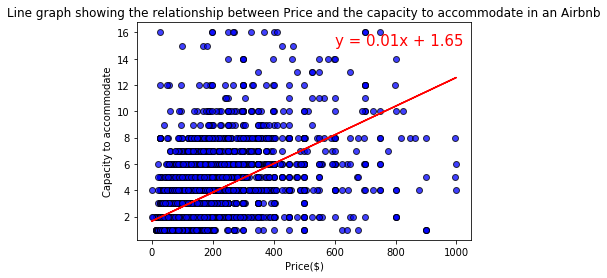

In [43]:
# Scatter plot for Price vs Accomodates
x_values = airbnb_ON_df["Price"]
y_values = airbnb_ON_df["Accommodates"]
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f"The r-squared is: {rvalue}")
print(f"The pvalue is: {pvalue}")
regress_value = x_values*slope + intercept
plt.scatter(x_values,y_values, marker="o", facecolors='blue', edgecolors="black",alpha=0.75)
plt.plot(x_values,regress_value,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Line graph showing the relationship between Price and the capacity to accommodate in an Airbnb")
plt.xlabel("Price($)")
plt.ylabel("Capacity to accommodate")
plt.annotate(line_eq,(600,15),fontsize=15,color='red')
plt.savefig("Images/ON/scatter_ON.png")

Observation:

With increase in space, price also increases. There is a moderate relationship between 2 variables, which is evident from r squared value. But, We still need to input more factors to find the infuence of hike in price across dwellings as we can see there are several residual values.

# Cancellation Policy For Ontario

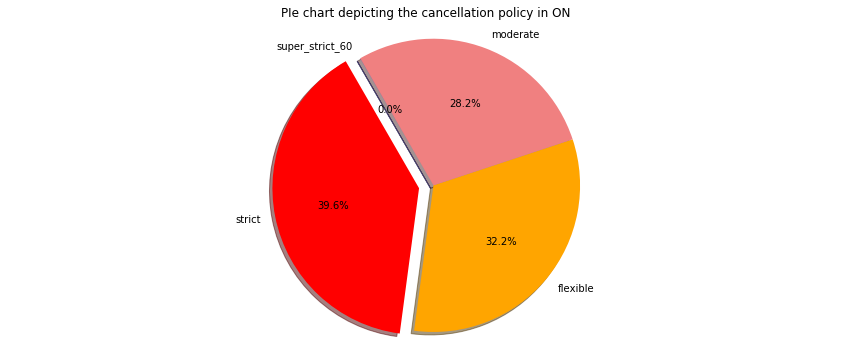

In [44]:
# Pie Chart for cancellation policy
on_cancel = airbnb_ON_df["Cancellation Policy"].value_counts()
on_policy = pd.DataFrame({"Count":on_cancel})

labels = ["strict", "flexible", "moderate","super_strict_60"]

# The values of each section of the pie chart
sizes = on_policy["Count"]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral","blue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0, 0,0)
plt.figure(figsize=(15,6))
plt.title("PIe chart depicting the cancellation policy in ON")
plt.pie(sizes,explode = explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.savefig("Images/ON/cancellation_policy_ON.png")

# Pie Chart for ON based on Host response time

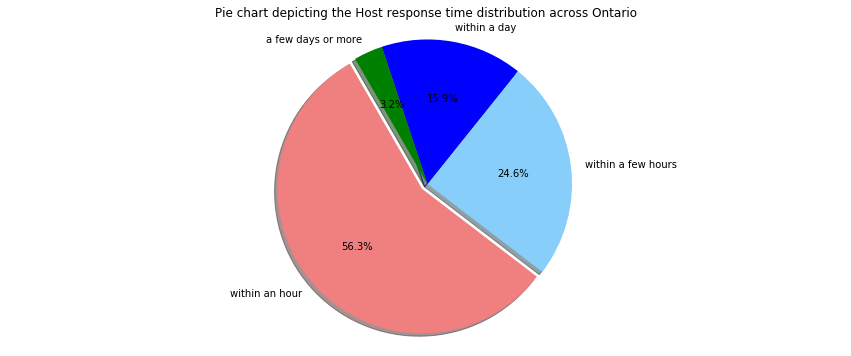

In [45]:
# Pie Chart for ON based on Host response time

# Series having the count of different response types
on_resp = airbnb_ON_df["Host Response Time"].value_counts()
colors = ["lightcoral", "lightskyblue","blue","green"]
explode = (0.05, 0, 0, 0)
plt.figure(figsize=(15,6))
plt.title("Pie chart depicting the Host response time distribution across Ontario")
plt.pie(on_resp.values,explode = explode, labels=on_resp.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.savefig("Images/ON/Response_pie_ON.png")

# Statistical Summary for all the Neighbourhoods.

In [46]:
on_listings = airbnb_ON_df.groupby(["Neighbourhood Cleansed"])["ID"].count()
on_price = round(airbnb_ON_df.groupby(["Neighbourhood Cleansed"])["Price"].mean(),2)
on_reviews = round(airbnb_ON_df.groupby(["Neighbourhood Cleansed"])["Number of Reviews"].mean(),2)
on_ratings = round(airbnb_ON_df.groupby(["Neighbourhood Cleansed"])["Review Scores Rating"].mean(),2)

on_summary = pd.DataFrame({"Number of listings":on_listings,"Average Price":on_price,
                          "Avg Number of reviews":on_reviews,"Avg of Ratings":on_ratings})
on_summary

Number of listings  Average Price  \
Neighbourhood Cleansed                                            
Agincourt North                               11          55.64   
Agincourt South-Malvern West                  56          76.50   
Alderwood                                     18         100.44   
Annex                                        485         120.84   
Banbury-Don Mills                             41         109.22   
...                                          ...            ...   
Wychwood                                      89          94.79   
Yonge-Eglinton                                78         133.96   
Yonge-St.Clair                                66         104.38   
York University Heights                       68          51.81   
Yorkdale-Glen Park                            26          79.96   

                              Avg Number of reviews  Avg of Ratings  
Neighbourhood Cleansed                                               
Agincourt North                                4.36           94.33  
Agincourt South-Malvern West                   7.50           89.24  
Alderwood                                     12.83           94.50  
Annex                                         14.59           92.79  
Banbury-Don Mills                              6.73           95.59  
...                                             ...             ...  
Wychwood                                       8.03           93.73  
Yonge-Eglinton                                 9.86           92.33  
Yonge-St.Clair                                10.92           93.46  
York University Heights                        5.87           89.26  
Yorkdale-Glen Park                            12.96           93.29  

[141 rows x 4 columns]

In [47]:
on_summary.describe()

Number of listings  Average Price  Avg Number of reviews  \
count          141.000000     141.000000             141.000000   
mean            89.780142      96.819433              11.276312   
std            194.537881      34.381769               6.603390   
min              1.000000      43.290000               0.000000   
25%             20.000000      74.950000               7.000000   
50%             37.000000      93.870000              10.350000   
75%             73.000000     113.670000              14.450000   
max           1975.000000     248.250000              46.620000   

       Avg of Ratings  
count      140.000000  
mean        93.659000  
std          2.815491  
min         82.000000  
25%         92.330000  
50%         94.035000  
75%         95.452500  
max        100.000000

# Top Neighbourhoods based on Number of listings, Average Price, Number of Reviews and Average Ratings

In [48]:
# Find the best neighbourhoods to rent in
# Criteria :
# 1. No. of listings > 73 (75% of the values are below 73)
# 2. Average Price <= 113.67 (75% of the values are below 113.67)
# 3. Average No. of reviews >= 14 (75% of the values are below this value)
# 4> Avg Ratings >= 73.5 (75% of the values are below this value)

mask1 = on_summary["Number of listings"] >= 89
mask2 = on_summary["Average Price"] <= 113.67
mask3 = on_summary["Avg Number of reviews"] >= 11
mask4 = on_summary["Avg of Ratings"] >= 93.6

best_neigh_on_df = on_summary[mask1 & mask2 & mask3 & mask4].sort_values("Avg of Ratings",ascending=False)
best_neigh_on_df

Number of listings  Average Price  \
Neighbourhood Cleansed                                                   
Little Portugal                                     399         111.44   
North St.James Town                                 130          91.14   
High Park North                                     128         106.33   
Dovercourt-Wallace Emerson-Junction                 413          96.38   
Dufferin Grove                                      155          95.56   
Palmerston-Little Italy                             314         102.13   
South Parkdale                                      249          97.65   

                                     Avg Number of reviews  Avg of Ratings  
Neighbourhood Cleansed                                                      
Little Portugal                                      19.03           94.88  
North St.James Town                                  14.13           94.42  
High Park North                                      11.87           94.40  
Dovercourt-Wallace Emerson-Junction                  14.06           94.12  
Dufferin Grove                                       19.98           93.97  
Palmerston-Little Italy                              16.32           93.83  
South Parkdale                                       18.39           93.71

In [49]:
lat_mean = airbnb_ON_df.groupby("Neighbourhood Cleansed")["Latitude"].mean()
lng_mean = airbnb_ON_df.groupby("Neighbourhood Cleansed")["Longitude"].mean()
best_neigh_on_df = best_neigh_on_df.merge(lat_mean,left_index=True,right_index=True)
best_neigh_on_df = best_neigh_on_df.merge(lng_mean,left_index=True,right_index=True)
best_neigh_on_df

Number of listings  Average Price  \
Neighbourhood Cleansed                                                   
Little Portugal                                     399         111.44   
North St.James Town                                 130          91.14   
High Park North                                     128         106.33   
Dovercourt-Wallace Emerson-Junction                 413          96.38   
Dufferin Grove                                      155          95.56   
Palmerston-Little Italy                             314         102.13   
South Parkdale                                      249          97.65   

                                     Avg Number of reviews  Avg of Ratings  \
Neighbourhood Cleansed                                                       
Little Portugal                                      19.03           94.88   
North St.James Town                                  14.13           94.42   
High Park North                                      11.87           94.40   
Dovercourt-Wallace Emerson-Junction                  14.06           94.12   
Dufferin Grove                                       19.98           93.97   
Palmerston-Little Italy                              16.32           93.83   
South Parkdale                                       18.39           93.71   

                                      Latitude  Longitude  
Neighbourhood Cleansed                                     
Little Portugal                      43.646311 -79.427951  
North St.James Town                  43.669535 -79.375678  
High Park North                      43.657434 -79.462368  
Dovercourt-Wallace Emerson-Junction  43.664694 -79.437419  
Dufferin Grove                       43.655561 -79.437774  
Palmerston-Little Italy              43.659036 -79.417837  
South Parkdale                       43.637990 -79.432540

In [50]:
best_neigh_on_df.reset_index(inplace=True)

In [51]:
# Best Neigbourhoods in Ontario
gmaps.configure(api_key=g_key)
info_box_template = """
<dl>
<dt>Name</dt><dd>{Neighbourhood Cleansed}</dd>
<dt>Number of listings</dt><dd>{Number of listings}</dd>
<dt>Average Price</dt><dd>${Average Price}</dd>
<dt>Rating</dt><dd>{Avg of Ratings}</dd>
</dl>
"""
# Store the DataFrame Row
neighbourhood_info = [info_box_template.format(**row) for index, row in best_neigh_on_df.iterrows()]
locations = best_neigh_on_df[["Latitude", "Longitude"]]
marker_layer = gmaps.marker_layer(locations,info_box_content=neighbourhood_info)
fig = gmaps.figure()
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# 3. Quebec (QC)

In [52]:
canada_qc = canada_file.loc[canada_file["State"]=="QC",:]
canada_qc.reset_index(inplace=True) 
del canada_qc['index']
canada_qc.head()

ID   Host ID Host Name Host Since  Host Response Time  \
0   3425542   7006808      Kael    19/6/13      within an hour   
1  14002006  38529310     Raoul    15/7/15      within an hour   
2  14878561  23998790   Claudya   21/11/14                 NaN   
3  11700240  62184925    ƒmilie     8/3/16  within a few hours   
4  15698733  20112353  Francois    16/8/14      within an hour   

   Host Listings Count Neighbourhood Cleansed             City State Country  \
0                  1.0           Quartier 5-1           Quebec    QC  Canada   
1                  3.0            Saint-Louis  Ville de QuŽbec    QC  Canada   
2                  2.0             Val-BŽlair  Ville de QuŽbec    QC  Canada   
3                  1.0             Val-BŽlair  Ville de QuŽbec    QC  Canada   
4                  4.0           Quartier 5-4  Ville de QuŽbec    QC  Canada   

   ...  Calendar last Scraped  Number of Reviews Last Review  \
0  ...                 6/5/17                 51      4/5/17   
1  ...                 6/5/17                 11     6/11/16   
2  ...                 6/5/17                  0         NaN   
3  ...                 6/5/17                  3    17/12/16   
4  ...                 6/5/17                  4     20/2/17   

  Review Scores Rating  Cancellation Policy                    Geolocation  \
0                 88.0               strict  46.9326563748, -71.1973977237   
1                 98.0             flexible  46.7621839496, -71.2966242093   
2                  NaN             flexible   46.8467444419, -71.410558484   
3                100.0             flexible  46.8608765148, -71.4221429362   
4                100.0             moderate  46.8592716801, -71.1965025554   

                                            Features  Host Year    year  month  
0  Host Has Profile Pic,Host Identity Verified,Is... 2013-06-19  2013.0    6.0  
1  Host Has Profile Pic,Is Location Exact,Instant... 2015-07-15  2015.0    7.0  
2                               Host Has Profile Pic 2014-11-21  2014.0   11.0  
3                               Host Has Profile Pic 2016-03-08  2016.0    3.0  
4             Host Has Profile Pic,Is Location Exact 2014-08-16  2014.0    8.0  

[5 rows x 31 columns]

In [53]:
# AirBnB Listings density in QC
locations = canada_qc[["Latitude","Longitude"]]
density = canada_qc["ID"]
fig = gmaps.figure()
fig

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=density, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=0.001)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [54]:
# AirBnB Price Range density in QC
locations = canada_qc[["Latitude","Longitude"]]
density = canada_qc["Price"]
fig = gmaps.figure()
fig

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=density, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=0.001)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

# Establish if any relationship between Price and Number of people a listing can Accommodate.

The r-squared is: 0.49365734593330995
The pvalue is: 0.0


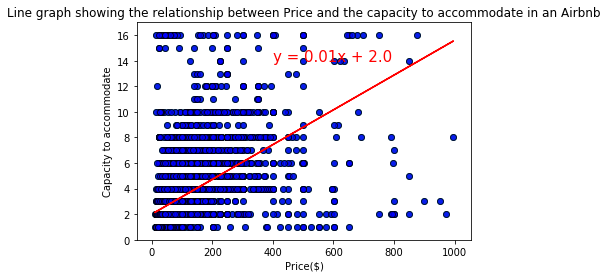

In [55]:
x_values = canada_qc["Price"]
y_values = canada_qc["Accommodates"]
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
plt.scatter(x_values,y_values)
print(f"The r-squared is: {rvalue}")
print(f"The pvalue is: {pvalue}")
regress_value = x_values*slope + intercept
plt.scatter(x_values,y_values, marker="o", facecolors='blue', edgecolors="black",alpha=0.75)
plt.plot(x_values,regress_value,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Line graph showing the relationship between Price and the capacity to accommodate in an Airbnb")
plt.xlabel("Price($)")
plt.ylabel("Capacity to accommodate")
plt.annotate(line_eq,(400,14),fontsize=15,color='red')
plt.savefig("Images/QC/scatter_QC.png")

# Cancellation Policy For QC

C:\Users\vijay\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



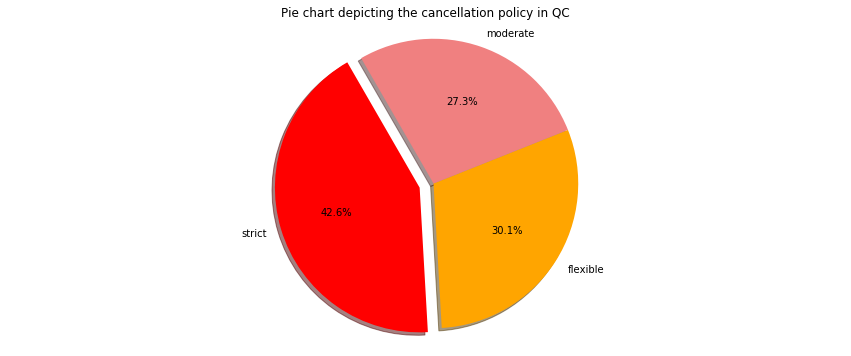

In [56]:
canada_qc['Cancellation Policy'].replace(to_replace='super_strict_30', value='strict', inplace=True)
canada_qc['Cancellation Policy'].replace(to_replace='long_term', value='flexible', inplace=True)

qc_cancel = canada_qc["Cancellation Policy"].value_counts()
qc_policy = pd.DataFrame({"Count":qc_cancel})

labels = ["strict", "flexible", "moderate"]

# The values of each section of the pie chart
sizes = qc_policy["Count"]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0, 0)
plt.figure(figsize=(15,6))
plt.title("Pie chart depicting the cancellation policy in QC")
plt.pie(sizes,explode = explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.savefig("Images/QC/cancellation_policy_QC.png")

# Pie Chart for QC based on Host response time

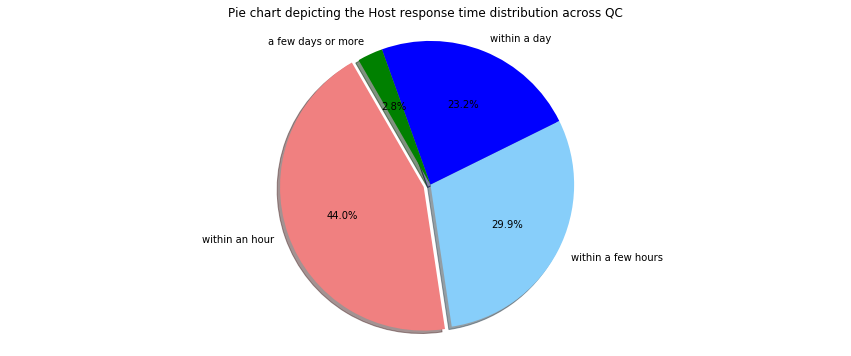

In [57]:
qn_resp = canada_qc["Host Response Time"].value_counts()
colors = ["lightcoral", "lightskyblue","blue","green"]
explode = (0.05, 0, 0, 0)
plt.figure(figsize=(15,6))
plt.title("Pie chart depicting the Host response time distribution across QC")
plt.pie(qn_resp.values,explode = explode, labels=qn_resp.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.savefig("Images/QC/Response_pie_QC.png")

# Statistical Summary for all the Neighbourhoods.

In [58]:
qc_summary = round(canada_qc.groupby(["Neighbourhood Cleansed"])["Price"].mean().to_frame(),2)
qc_summary = qc_summary.rename(columns = {"Price" : "Average Price"})
qc_summary = '$'+qc_summary.astype(str)
qc_summary['Number of Listings'] = round(canada_qc.groupby(["Neighbourhood Cleansed"])["ID"].count(),2)
qc_summary['Avg Number of reviews'] = round(canada_qc.groupby(["Neighbourhood Cleansed"])["Number of Reviews"].mean(),2)
qc_summary['Avg of Ratings'] = round(canada_qc.groupby(["Neighbourhood Cleansed"])["Review Scores Rating"].mean(),2)

qc_summary

Average Price  \
Neighbourhood Cleansed                                       
Ahuntsic-Cartierville                               $77.53   
Anjou                                               $57.16   
Baie-d'UrfŽ                                         $342.0   
Beaconsfield                                        $98.33   
Cap-Rouge                                          $122.54   
...                                                    ...   
Vieux-QuŽbec/Cap-Blanc/Colline parlementaire       $126.95   
Ville-Marie                                        $102.24   
Villeray-Saint-Michel-Parc-Extension                $62.81   
Westmount                                          $114.22   
Willowdale East                                      $55.0   

                                              Number of Listings  \
Neighbourhood Cleansed                                             
Ahuntsic-Cartierville                                        175   
Anjou                                                         31   
Baie-d'UrfŽ                                                    2   
Beaconsfield                                                   9   
Cap-Rouge                                                     26   
...                                                          ...   
Vieux-QuŽbec/Cap-Blanc/Colline parlementaire                 244   
Ville-Marie                                                 2365   
Villeray-Saint-Michel-Parc-Extension                         674   
Westmount                                                    100   
Willowdale East                                                3   

                                              Avg Number of reviews  \
Neighbourhood Cleansed                                                
Ahuntsic-Cartierville                                          5.88   
Anjou                                                          6.23   
Baie-d'UrfŽ                                                   27.00   
Beaconsfield                                                   2.56   
Cap-Rouge                                                      3.00   
...                                                             ...   
Vieux-QuŽbec/Cap-Blanc/Colline parlementaire                  25.09   
Ville-Marie                                                   13.95   
Villeray-Saint-Michel-Parc-Extension                           4.64   
Westmount                                                      5.37   
Willowdale East                                                0.67   

                                              Avg of Ratings  
Neighbourhood Cleansed                                        
Ahuntsic-Cartierville                                  93.23  
Anjou                                                  92.69  
Baie-d'UrfŽ                                            98.00  
Beaconsfield                                           93.50  
Cap-Rouge                                              95.62  
...                                                      ...  
Vieux-QuŽbec/Cap-Blanc/Colline parlementaire           93.83  
Ville-Marie                                            92.12  
Villeray-Saint-Michel-Parc-Extension                   92.18  
Westmount                                              90.63  
Willowdale East                                       100.00  

[70 rows x 4 columns]

In [59]:
qc_summary_sort = qc_summary
qc_summary_sort[['Average Price']] = qc_summary_sort[['Average Price']].replace('[\$,]','',regex=True).astype(float)
qc_summary_sort = qc_summary_sort.sort_values(["Average Price"],ascending = True)

qc_summary_sort

Average Price  Number of Listings  \
Neighbourhood Cleansed                                             
MontrŽal-Est                           43.00                   3   
Willowdale East                        55.00                   3   
Dollard-des-Ormeaux                    55.33                  12   
Anjou                                  57.16                  31   
Saint-LŽonard                          57.17                  23   
...                                      ...                 ...   
Sainte-Anne-de-Bellevue               137.50                   2   
L'ële-Bizard-Sainte-Genevi�ve         150.00                   6   
Hampstead                             160.89                   9   
C™te-Saint-Luc                        162.28                  18   
Baie-d'UrfŽ                           342.00                   2   

                               Avg Number of reviews  Avg of Ratings  
Neighbourhood Cleansed                                                
MontrŽal-Est                                    0.33          100.00  
Willowdale East                                 0.67          100.00  
Dollard-des-Ormeaux                             3.67           93.29  
Anjou                                           6.23           92.69  
Saint-LŽonard                                   1.61           87.22  
...                                              ...             ...  
Sainte-Anne-de-Bellevue                         2.00           87.00  
L'ële-Bizard-Sainte-Genevi�ve                   0.50          100.00  
Hampstead                                       2.22           96.20  
C™te-Saint-Luc                                  2.44           85.30  
Baie-d'UrfŽ                                    27.00           98.00  

[70 rows x 4 columns]

In [60]:
qc_stats = qc_summary_sort.describe()
qc_stats

Average Price  Number of Listings  Avg Number of reviews  \
count      70.000000           70.000000              70.000000   
mean       93.737286          178.685714               9.415286   
std        39.568656          481.940207               7.495409   
min        43.000000            1.000000               0.000000   
25%        72.217500           12.000000               3.740000   
50%        85.855000           26.500000               6.525000   
75%       108.242500           95.000000              13.957500   
max       342.000000         2947.000000              28.170000   

       Avg of Ratings  
count       69.000000  
mean        92.417681  
std          3.612706  
min         83.000000  
25%         90.830000  
50%         93.000000  
75%         94.090000  
max        100.000000

# Top Neighbourhoods based on Number of listings, Average Price, Number of Reviews and Average Ratings

In [61]:
qc_list = qc_summary_sort.loc[(qc_summary_sort["Number of Listings"]>=178) & (qc_summary_sort["Average Price"]<=108) &
                        (qc_summary_sort["Avg Number of reviews"]>=9.5) & (qc_summary_sort["Avg of Ratings"]>=92)]
qc_list

Average Price  Number of Listings  \
Neighbourhood Cleansed                                      
Saint-Jean-Baptiste             86.03                 180   
Le Plateau-Mont-Royal           86.03                2947   
Ville-Marie                    102.24                2365   

                        Avg Number of reviews  Avg of Ratings  
Neighbourhood Cleansed                                         
Saint-Jean-Baptiste                     28.17           92.95  
Le Plateau-Mont-Royal                   11.32           92.96  
Ville-Marie                             13.95           92.12

In [62]:
lat_mean = canada_qc.groupby("Neighbourhood Cleansed")["Latitude"].mean()
lng_mean = canada_qc.groupby("Neighbourhood Cleansed")["Longitude"].mean()
qc_list = qc_list.merge(lat_mean,left_index=True,right_index=True)
qc_list = qc_list.merge(lng_mean,left_index=True,right_index=True)
qc_list

Average Price  Number of Listings  \
Neighbourhood Cleansed                                      
Saint-Jean-Baptiste             86.03                 180   
Le Plateau-Mont-Royal           86.03                2947   
Ville-Marie                    102.24                2365   

                        Avg Number of reviews  Avg of Ratings   Latitude  \
Neighbourhood Cleansed                                                     
Saint-Jean-Baptiste                     28.17           92.95  46.809492   
Le Plateau-Mont-Royal                   11.32           92.96  45.523501   
Ville-Marie                             13.95           92.12  45.510220   

                        Longitude  
Neighbourhood Cleansed             
Saint-Jean-Baptiste    -71.222176  
Le Plateau-Mont-Royal  -73.581885  
Ville-Marie            -73.564170

In [63]:
qc_list.reset_index(inplace=True)

In [64]:
info_box_template = """
<dl>
<dt>Name</dt><dd>{Neighbourhood Cleansed}</dd>
<dt>Number of Listings</dt><dd>{Number of Listings}</dd>
<dt>Average Price</dt><dd>${Average Price}</dd>
<dt>Rating</dt><dd>{Avg of Ratings}</dd>
</dl>
"""
# Store the DataFrame Row
neighbourhood_info = [info_box_template.format(**row) for index, row in qc_list.iterrows()]
locations = qc_list[["Latitude", "Longitude"]]
marker_layer = gmaps.marker_layer(locations,info_box_content=neighbourhood_info)
fig = gmaps.figure()
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))